In [1]:
# run this everytime you open the window (it resets everytime you close the tab)
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [2]:
# import libs - like library() in R
import time

import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import streamlit as st

In [5]:
conn = duckdb.connect()

query = """
CREATE TABLE mytable AS
SELECT
    column0 AS sepal_length,
    column1 AS sepal_width,
    column2 AS petal_length,
    column3 AS petal_width,
    column4 AS species
FROM read_csv_auto('iris.data');
"""
# Creates table
conn.execute(query)


query = """
select *
from mytable
"""

shiw = conn.sql(query).show()
shiw
df = conn.sql(query).df()
df

┌──────────────┬─────────────┬──────────────┬─────────────┬────────────────┐
│ sepal_length │ sepal_width │ petal_length │ petal_width │    species     │
│    double    │   double    │    double    │   double    │    varchar     │
├──────────────┼─────────────┼──────────────┼─────────────┼────────────────┤
│          5.1 │         3.5 │          1.4 │         0.2 │ Iris-setosa    │
│          4.9 │         3.0 │          1.4 │         0.2 │ Iris-setosa    │
│          4.7 │         3.2 │          1.3 │         0.2 │ Iris-setosa    │
│          4.6 │         3.1 │          1.5 │         0.2 │ Iris-setosa    │
│          5.0 │         3.6 │          1.4 │         0.2 │ Iris-setosa    │
│          5.4 │         3.9 │          1.7 │         0.4 │ Iris-setosa    │
│          4.6 │         3.4 │          1.4 │         0.3 │ Iris-setosa    │
│          5.0 │         3.4 │          1.5 │         0.2 │ Iris-setosa    │
│          4.4 │         2.9 │          1.4 │         0.2 │ Iris-setosa    │

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
fig=px.scatter(
            df,
            x="sepal_width",
            y="sepal_length",
            color="species",
            hover_name="species",
            log_x=True,
        )

        # Use the Streamlit theme.
        # This is the default. So you can also omit the theme argument.
fig

<Axes: xlabel='species', ylabel='sepal_length'>

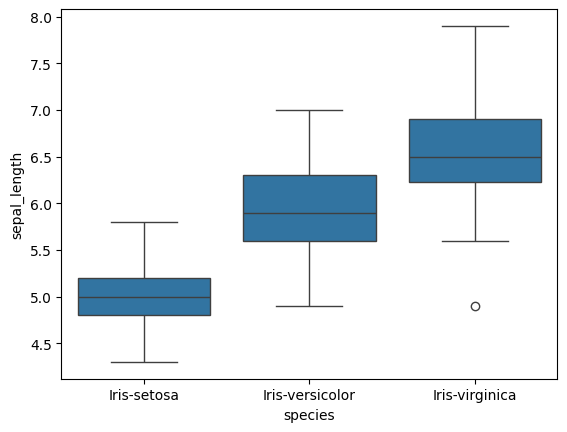

In [13]:
sns.boxplot(data=df, x="species", y="sepal_length")


<Axes: ylabel='Count'>

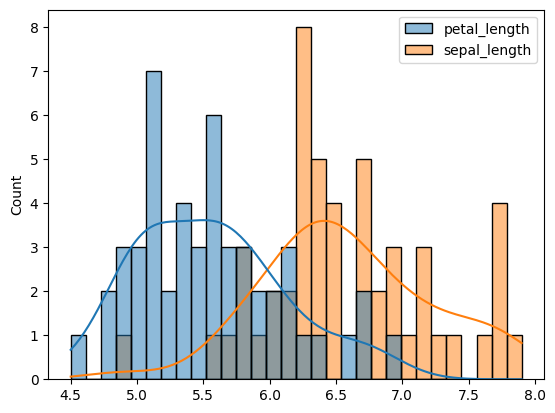

In [15]:
product_filter="Iris-virginica"
query = (
            """
        select petal_length,sepal_length from mytable where species = '"""
            + product_filter
            + """'
        """
        )

tworesult = conn.sql(query).df()

sns.histplot(tworesult, kde=True, bins=30, color="blue", label="x")
